# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [2]:
from tkinter.tix import DisplayStyle

import pandas as pd
import plotly.express as px
from networkx.algorithms.bipartite.basic import color
from rich.jupyter import display

/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_8983/4206255147.py:1: DeprecationWarning: The Tix Tk extension is unmaintained, and the tkinter.tix wrapper module is deprecated in favor of tkinter.ttk
  from tkinter.tix import DisplayStyle


In [3]:
Annotation_df = pd.read_csv("/Users/cavend/Downloads/gencode.v29.primary_assembly.annotation_renamed_full_subset80.gtf", sep='\t', header=None)

/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_8983/2519460780.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Annotation_df = pd.read_csv("/Users/cavend/Downloads/gencode.v29.primary_assembly.annotation_renamed_full_subset80.gtf", sep='\t', header=None)


In [4]:
# Split the 9th column (Info) by ';' and expand into new columns
df_split = Annotation_df.iloc[:, 8].str.split(';', expand=True)

# Combine the original DataFrame (excluding the 9th column) with the split columns
Annotation_df_split = pd.concat([Annotation_df.drop(columns=Annotation_df.columns[8]), df_split], axis=1)

In [5]:
Annotation_df_split.columns = range(Annotation_df_split.shape[1])

In [6]:
Annotation_df_split_rename = Annotation_df_split
Annotation_df_split_rename = Annotation_df_split_rename.rename(columns={8: 'gene_id'})
Annotation_df_split_rename = Annotation_df_split_rename.rename(columns={9: 'transcript_id'})
Annotation_df_split_rename = Annotation_df_split_rename.rename(columns={10: 'gene_type'})

Annotation_df_split_rename['gene_id'] = Annotation_df_split_rename['gene_id'].str.strip().str.replace('^gene_id ', '', regex=True)
Annotation_df_split_rename['gene_id'] = Annotation_df_split_rename['gene_id'].str.strip().str.replace('"', '', regex=True)
Annotation_df_split_rename['transcript_id'] = Annotation_df_split_rename['transcript_id'].str.strip().str.replace('^transcript_id ', '', regex=True)
Annotation_df_split_rename['transcript_id'] = Annotation_df_split_rename['transcript_id'].str.strip().str.replace('"', '', regex=True)
Annotation_df_split_rename['gene_type'] = Annotation_df_split_rename['gene_type'].str.strip().str.replace('^gene_type ', '', regex=True)
Annotation_df_split_rename['gene_type'] = Annotation_df_split_rename['gene_type'].str.strip().str.replace('"', '', regex=True)


In [7]:
Annotation_df_split_rename_Small = Annotation_df_split_rename[['gene_id', 'transcript_id', 'gene_type']]
Annotation_df_split_rename_Small_filtered = Annotation_df_split_rename_Small[Annotation_df_split_rename_Small['gene_type'] == 'protein_coding']
Annotation_df_split_rename_Small_filtered = Annotation_df_split_rename_Small_filtered.drop_duplicates()
Annotation_df_split_rename_Small_filtered

,gene_id,transcript_id,gene_type
40,ENSG00000186092.6,ENST00000641515.2,protein_coding
51,ENSG00000186092.6,ENST00000335137.4,protein_coding
196,ENSG00000284733.1,ENST00000426406.3,protein_coding
285,ENSG00000284662.1,ENST00000332831.4,protein_coding
439,ENSG00000187634.11,ENST00000618181.4,protein_coding
...,...,...,...
1781656,ENSG00000277761.1,ENST00000614110.1,protein_coding
1781661,ENSG00000278633.1,ENST00000619792.1,protein_coding
1781679,ENSG00000276017.1,ENST00000617983.1,protein_coding
1781685,ENSG00000278817.1,ENST00000613204.1,protein_coding


In [8]:
SRR19762165_df = pd.read_csv("/Users/cavend/Desktop/SRR19762165_rpvg.csv")
#SRR19762165_df = pd.read_csv("/Users/cavend/Downloads/rpvg_mpmap_1kg_NA12878_gencode100_sim_vg_r2_SRR1153470_joint.txt", delimiter='\t')
SRR19762165_df['transcript_id'] = SRR19762165_df['Name_1']
SRR19762165_df['transcript_id'] = SRR19762165_df['transcript_id'].str.replace(r'_\d+', '', regex=True)

SRR19762165_df

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,total_count,transcript_id
0,ENST00000619601.1,ENST00000619601.1,3,1.000000,13261.0,1646.145100,13261.0,1646.145100,2.652124e+04,ENST00000619601.1
1,ENST00000396858.5,ENST00000396858.5,3,0.955315,13.0,1.313945,13.0,1.313945,2.685842e+01,ENST00000396858.5
2,ENST00000496049.1,ENST00000496049.1,3,0.998583,5.0,3.448161,5.0,3.448161,9.604708e+00,ENST00000496049.1
3,ENST00000229239.9,ENST00000229239.9,3,0.992353,11226.0,686.720770,11226.0,686.720770,2.245282e+04,ENST00000229239.9
4,ENST00000229239.9_60,ENST00000229239.9,3,0.003738,42.0,2.586375,42.0,2.586375,8.456334e+01,ENST00000229239.9
...,...,...,...,...,...,...,...,...,...,...
43510,ENST00000573224.2_33,ENST00000573224.2_45,4338,1.000000,16.0,1.932842,16.0,1.907655,3.210773e+01,ENST00000573224.2
43511,ENST00000575949.6_52,ENST00000575949.6_52,4338,1.000000,11.0,0.919989,11.0,0.919989,2.174494e+01,ENST00000575949.6
43512,ENST00000576910.7_36,ENST00000576910.7_62,4338,1.000000,0.0,0.019073,8.0,0.483616,8.304221e+00,ENST00000576910.7
43513,ENST00000225567.9_33,ENST00000225567.9_41,4338,1.000000,0.0,0.000000,8.0,0.835184,8.123463e+00,ENST00000225567.9


In [9]:
#SRR19762165_df_merge = pd.merge(SRR19762165_df, Annotation_df_split_rename, on='transcript_id', how='left')
SRR19762165_df_merge = SRR19762165_df.merge(Annotation_df_split_rename_Small_filtered, on='transcript_id')
SRR19762165_df_merge

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,total_count,transcript_id,gene_id,gene_type
0,ENST00000619601.1,ENST00000619601.1,3,1.000000,13261.0,1646.145100,13261.0,1646.145100,26521.244000,ENST00000619601.1,ENSG00000111640.14,protein_coding
1,ENST00000396858.5,ENST00000396858.5,3,0.955315,13.0,1.313945,13.0,1.313945,26.858424,ENST00000396858.5,ENSG00000111640.14,protein_coding
2,ENST00000229239.9,ENST00000229239.9,3,0.992353,11226.0,686.720770,11226.0,686.720770,22452.818000,ENST00000229239.9,ENSG00000111640.14,protein_coding
3,ENST00000229239.9_60,ENST00000229239.9,3,0.003738,42.0,2.586375,42.0,2.586375,84.563340,ENST00000229239.9,ENSG00000111640.14,protein_coding
4,ENST00000466588.5,ENST00000466588.5,3,0.974945,8.0,0.702961,8.0,0.702961,15.418376,ENST00000466588.5,ENSG00000111640.14,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...
33108,ENST00000638892.1_83,ENST00000638892.1_90,4338,1.000000,8.0,0.228965,0.0,0.011134,8.822165,ENST00000638892.1,ENSG00000108433.16,protein_coding
33109,ENST00000639822.1_87,ENST00000639822.1_92,4338,0.847189,0.0,0.000000,9.0,0.653850,8.538121,ENST00000639822.1,ENSG00000262633.2,protein_coding
33110,ENST00000573224.2_33,ENST00000573224.2_45,4338,1.000000,16.0,1.932842,16.0,1.907655,32.107734,ENST00000573224.2,ENSG00000108433.16,protein_coding
33111,ENST00000576910.7_36,ENST00000576910.7_62,4338,1.000000,0.0,0.019073,8.0,0.483616,8.304221,ENST00000576910.7,ENSG00000108433.16,protein_coding


In [10]:
SRR19762165_filter_dropped = SRR19762165_df_merge.iloc[:, 3:]
SRR19762165_filter_dropped = SRR19762165_filter_dropped.drop('transcript_id', axis=1)
SRR19762165_filter_dropped

,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,total_count,gene_id,gene_type
0,1.000000,13261.0,1646.145100,13261.0,1646.145100,26521.244000,ENSG00000111640.14,protein_coding
1,0.955315,13.0,1.313945,13.0,1.313945,26.858424,ENSG00000111640.14,protein_coding
2,0.992353,11226.0,686.720770,11226.0,686.720770,22452.818000,ENSG00000111640.14,protein_coding
3,0.003738,42.0,2.586375,42.0,2.586375,84.563340,ENSG00000111640.14,protein_coding
4,0.974945,8.0,0.702961,8.0,0.702961,15.418376,ENSG00000111640.14,protein_coding
...,...,...,...,...,...,...,...,...
33108,1.000000,8.0,0.228965,0.0,0.011134,8.822165,ENSG00000108433.16,protein_coding
33109,0.847189,0.0,0.000000,9.0,0.653850,8.538121,ENSG00000262633.2,protein_coding
33110,1.000000,16.0,1.932842,16.0,1.907655,32.107734,ENSG00000108433.16,protein_coding
33111,1.000000,0.0,0.019073,8.0,0.483616,8.304221,ENSG00000108433.16,protein_coding


In [11]:
agg_funcs = {
    'HaplotypingProbability': 'mean',
    'ReadCount_1': 'sum',
    'TPM_1': 'sum',
    'ReadCount_2': 'sum',
    'TPM_2': 'sum',
    #'total_count': 'sum',
    'gene_type': 'first'  # Assuming gene_type is the same for the same gene_id
}

# Group by 'gene_id' and aggregate
SRR19762165_filter_dropped_grouped = SRR19762165_filter_dropped.groupby('gene_id').agg(agg_funcs).reset_index()
SRR19762165_filter_dropped_grouped

SRR19762165_filter_dropped_grouped.to_csv('/Users/cavend/Desktop/SRR19762165_On_Genetype_proteincoding.csv', index=False)
#SRR19762165_filter_dropped_grouped.to_csv('/Users/cavend/Desktop/VG_TEAM_NA12878_On_Genetype_proteincoding.csv', index=False)

In [12]:
#df_MAGE = pd.read_csv("/Users/cavend/Downloads/NA19717.concatenated_phaser.haplotypic_counts.txt", delimiter='\t')
df_MAGE = pd.read_csv("/Users/cavend/Downloads/NA12878.concatenated.hap.gene.txt", delimiter='\t')
df_MAGE

count = (df_MAGE['totalCount'] > 10).sum()

print(count)

7501


In [13]:
SRR19762165_filter_dropped_grouped['totalCount'] = SRR19762165_filter_dropped_grouped['ReadCount_1'] + SRR19762165_filter_dropped_grouped['ReadCount_2']
SRR19762165_filter_dropped_grouped

count = (SRR19762165_filter_dropped_grouped['totalCount'] > 10).sum()

print(count)

10235


In [14]:
SRR19762165_df_grouped = SRR19762165_df
SRR19762165_df_grouped['totalCount'] = SRR19762165_df_grouped['ReadCount_1'] + SRR19762165_df_grouped['ReadCount_2']
SRR19762165_df_grouped

count = (SRR19762165_df_grouped['totalCount'] > 10).sum()

print(count)

38803


In [15]:
#SPACE

In [16]:
import os
import pandas as pd

# Set the directory path and output directory
#input_directory = "/Users/cavend/Desktop/20_EUROPE/RPVG_EUR_20/"
input_directory = "/Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/VG_TEAM"
#output_directory = "/Users/cavend/Desktop/20_EUROPERPVG_EUR_20_Processed/"
output_directory = "/Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/Processed/"

# Load the Name Key DataFrame
#Name_Key_DF = pd.read_csv("/Users/cavend/Desktop/20_EUROPE/FULL_SRA_SRR_EUR_20.txt", delimiter='\t', header=None)
#Name_Key_DF.columns = ['MAGE', 'SRS', 'SRR']

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

number_codes = []

# Loop through each file in the directory
for filename in os.listdir(input_directory):
    # Check if the file is a text file
    if filename.endswith(".txt"):
        file_path = os.path.join(input_directory, filename)
        
        # Extract the SRR identifier from the filename (assuming it's part of the filename)
        srr_id = filename.split("_")[0]  # Adjust this based on actual filename format
        number_codes.append(srr_id)
        
        # Retrieve the MAGE value corresponding to this SRR
        #mage_row = Name_Key_DF[Name_Key_DF['SRR'] == srr_id]
        #if mage_row.empty:
        #    print(f"No matching MAGE value found for {srr_id}. Skipping file.")
        #    continue
        #mage_value = mage_row['MAGE'].values[0]
        
        # Load the data
        Pangenome_df = pd.read_csv(file_path, delimiter='\t')

        # Process the data as in your code
        Pangenome_df['transcript_id'] = Pangenome_df['Name_1']
        Pangenome_df['transcript_id'] = Pangenome_df['transcript_id'].str.replace(r'_\d+', '', regex=True)
        
        Pangenome_df_merge = Pangenome_df.merge(Annotation_df_split_rename_Small_filtered, on='transcript_id')
        
        Pangenome_filter_dropped = Pangenome_df_merge.iloc[:, 3:]
        Pangenome_filter_dropped = Pangenome_filter_dropped.drop('transcript_id', axis=1)
        
        agg_funcs = {
            'HaplotypingProbability': 'mean',
            'ReadCount_1': 'sum',
            'TPM_1': 'sum',
            'ReadCount_2': 'sum',
            'TPM_2': 'sum',
            'gene_type': 'first'  # Assuming gene_type is the same for the same gene_id
        }

        Pangenome_filter_dropped_grouped = Pangenome_filter_dropped.groupby('gene_id').agg(agg_funcs).reset_index()

        # Define output file path with the MAGE value in the name
        #output_filename = f"{mage_value}_RPVG_GENOTYPE_PANGEOME.csv"
        output_filename = f"{srr_id}_RPVG_GENOTYPE_PANGEOME.csv"
        output_file_path = os.path.join(output_directory, output_filename)

        # Save the processed data as a separate CSV
        Pangenome_filter_dropped_grouped.to_csv(output_file_path, index=False)
        print(f"File saved: {output_file_path}")

File saved: /Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/Processed/NA12878-ALLnonCEU_RPVG_GENOTYPE_PANGEOME.csv
File saved: /Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/Processed/NA12878-EURnonCEU_RPVG_GENOTYPE_PANGEOME.csv
File saved: /Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/Processed/NA12878-ALL_RPVG_GENOTYPE_PANGEOME.csv


In [17]:
number_codes[1]

'NA12878-EURnonCEU'

In [56]:
# Path to the directory containing the files
directory_path = '/Users/cavend/Desktop/20_EUROPE/RPVG_EUR_20_Processed'
#directory_path = '/Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/Processed'

# Dictionary to hold the dataframes
dataframes = {}
number_codes = []

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Extract the number code from the filename
        number_code = filename.split('.')[0]

        # Load the file into a dataframe
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)  # Adjust `sep` and `header` if needed

        # Rename the 'name' column to 'gene_id'
        if 'name' in df.columns:
            df.rename(columns={'name': 'gene_id'}, inplace=True)

        df['gene_id'] = df['gene_id'].str.split('.').str[0]

        # Dynamically name the dataframe and store it in the dictionary
        dataframe_name = f"{number_code}_MAGE_DF"
        dataframes[dataframe_name] = df
        globals()[dataframe_name] = df  # Creates a global variable with the dataframe name
        
        # Load the file into a dataframe
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)  # Adjust `sep` and `header` if needed
        
        df['gene_id'] = df['gene_id'].str.split('.').str[0]
        
        # Dynamically name the dataframe and store it in the dictionary
        dataframe_name = f"{number_code}_PANGENOME_DF"
        dataframes[dataframe_name] = df
        globals()[dataframe_name] = df  # Creates a global variable with the dataframe name
        
        print(dataframe_name)

HG00127_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00142_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00254_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00243_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00148_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00260_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00121_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00114_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00237_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00130_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00160_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00244_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00146_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00132_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00265_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00141_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00250_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00151_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00122_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF
HG00233_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF


In [57]:
dataframe_name

'HG00233_RPVG_GENOTYPE_PANGEOME_PANGENOME_DF'

In [75]:
# Path to the directory containing the files
directory_path = '/Users/cavend/Desktop/20_EUROPE/MAGE_20_EUR'
#directory_path = '/Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/'
# Dictionary to hold the dataframes
dataframes = {}
#number_codes = []

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):
        # Extract the number code from the filename
        number_code = filename.split('.')[0]
        #number_codes.append(number_code)
        
        # Load the file into a dataframe
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path, sep='\t', header=0)  # Adjust `sep` and `header` if needed
        
        # Rename the 'name' column to 'gene_id'
        if 'name' in df.columns:
            df.rename(columns={'name': 'gene_id'}, inplace=True)
            
        df['gene_id'] = df['gene_id'].str.split('.').str[0]
    
        # Dynamically name the dataframe and store it in the dictionary
        dataframe_name = f"{number_code}_MAGE_DF"
        dataframes[dataframe_name] = df
        globals()[dataframe_name] = df  # Creates a global variable with the dataframe name

In [85]:
# Path to the directory containing the files
directory_path = '/Users/cavend/Desktop/20_EUROPE/EUR_20_Analysis/CSVs/'
#directory_path = '/Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/'
# Dictionary to hold the dataframes
dataframes = {}
number_codes = []

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        
        number_code = filename.split('_')[0]
        number_codes.append(number_code)

        # Load the file into a dataframe
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)  # Adjust `sep` and `header` if needed
    
        # Dynamically name the dataframe and store it in the dictionary
        dataframe_name = f"{number_code}_MAGE_DF"
        dataframes[dataframe_name] = df
        globals()[dataframe_name] = df  # Creates a global variable with the dataframe name
        print(dataframe_name)

HG00265_MAGE_DF
HG00146_MAGE_DF
HG00114_MAGE_DF
HG00237_MAGE_DF
HG00142_MAGE_DF
HG00260_MAGE_DF
HG00233_MAGE_DF
HG00141_MAGE_DF
HG00151_MAGE_DF
HG00148_MAGE_DF
HG00132_MAGE_DF
HG00130_MAGE_DF
HG00243_MAGE_DF
HG00160_MAGE_DF
HG00244_MAGE_DF
HG00121_MAGE_DF
HG00122_MAGE_DF
HG00250_MAGE_DF
HG00254_MAGE_DF
HG00127_MAGE_DF


{'HG00265_MAGE_DF':                gene_id  HaplotypingProbability  ReadCount_1      TPM_1  \
 0      ENSG00000000003                0.121212     3.048865   0.330511   
 1      ENSG00000000419                0.750000   384.197768  55.912604   
 2      ENSG00000000457                0.181818    44.654540   1.454054   
 3      ENSG00000000460                0.258065    62.817442   5.491271   
 4      ENSG00000000938                0.714286   398.611776  25.626034   
 ...                ...                     ...          ...        ...   
 14727  ENSG00000285943                0.055556     9.163636   0.158367   
 14728  ENSG00000285976                0.142857   496.727124  11.724297   
 14729  ENSG00000285978                0.018519     0.000000   0.000000   
 14730  ENSG00000285982                1.000000     0.000000   0.000000   
 14731  ENSG00000285991                0.012500     0.000000   0.000000   
 
        ReadCount_2      TPM_2       gene_type  aCount  bCount    Pan_Total  \


In [74]:
import numpy as np

for i in number_codes:
    
    dataframe_name = f"{i}_PANGENOME_DF"
    DF_PAN = globals()[dataframe_name]
    
    #dataframe_name = f"{i}_MAGE_DF"
    #{number_code}_MAGE_DF = globals()[dataframe_name]
    
    merged_PAN_MAGE_DATAFRAMES = DF_PAN.merge(DF_MAGE[['gene_id', 'aCount', 'bCount']], on='gene_id', how='left')
    
    merged_PAN_MAGE_DATAFRAMES["Pan_Total"] = merged_PAN_MAGE_DATAFRAMES["ReadCount_1"] + merged_PAN_MAGE_DATAFRAMES["ReadCount_2"]
    merged_PAN_MAGE_DATAFRAMES["MAGE_Total"] = merged_PAN_MAGE_DATAFRAMES["aCount"] + merged_PAN_MAGE_DATAFRAMES["bCount"]
    
    merged_PAN_MAGE_DATAFRAMES['log_Pan_Total'] = np.log2(merged_PAN_MAGE_DATAFRAMES['Pan_Total']).abs()
    merged_PAN_MAGE_DATAFRAMES['log_MAGE_Total'] = np.log2(merged_PAN_MAGE_DATAFRAMES['MAGE_Total']).abs()
    
    merged_PAN_MAGE_DATAFRAMES['log_Pan_h1_h2'] = np.log2(((merged_PAN_MAGE_DATAFRAMES['ReadCount_1']+1)/(merged_PAN_MAGE_DATAFRAMES['ReadCount_2']+1)))
    merged_PAN_MAGE_DATAFRAMES['log_MAGE_h1_h2'] = np.log2(((merged_PAN_MAGE_DATAFRAMES['aCount']+1)/(merged_PAN_MAGE_DATAFRAMES['bCount']+1)))
    
    merged_PAN_MAGE_DATAFRAMES['ReadCount_1_int'] = merged_PAN_MAGE_DATAFRAMES['ReadCount_1'].astype('int')
    merged_PAN_MAGE_DATAFRAMES['ReadCount_2_int'] = merged_PAN_MAGE_DATAFRAMES['ReadCount_2'].astype('int')
    
    merged_PAN_MAGE_DATAFRAMES['ReadCount_1_int'] = merged_PAN_MAGE_DATAFRAMES['ReadCount_1_int'] + 1
    merged_PAN_MAGE_DATAFRAMES['ReadCount_2_int'] = merged_PAN_MAGE_DATAFRAMES['ReadCount_2_int'] + 1
    
    dataframe_name = f"{i}_PAN_MAGE_DF"
    dataframes[dataframe_name] = merged_PAN_MAGE_DATAFRAMES
    globals()[dataframe_name] = merged_PAN_MAGE_DATAFRAMES
    
    
    
    merged_PAN_MAGE_DATAFRAMES.to_csv(f"/Users/cavend/Desktop/20_EUROPE/EUR_20_Analysis/CSVs/{i}_PAN_MAGE_Merged.csv", index=False)
    #merged_PAN_MAGE_DATAFRAMES.to_csv(f"/Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/CSVs/{i}_PAN_MAGE_Merged.csv", index=False)
    

In [95]:
for i in number_codes:
    
    #dataframe_name = f"{i}_PAN_MAGE_DF"
    dataframe_name = f"{i}_MAGE_DF"
    DF_PAN_MAGE_Merge = globals()[dataframe_name]
    
    DF_PAN_MAGE_Merge['log_Pan_Total'] = np.log2(DF_PAN_MAGE_Merge['Pan_Total']+1)
    DF_PAN_MAGE_Merge['log_MAGE_Total'] = np.log2(DF_PAN_MAGE_Merge['MAGE_Total']+1)
    
    DF_PAN_MAGE_Merge.to_csv(f"/Users/cavend/Desktop/20_EUROPE/EUR_20_Analysis/CSVs/{i}_PAN_MAGE_Merged.csv", index=False)

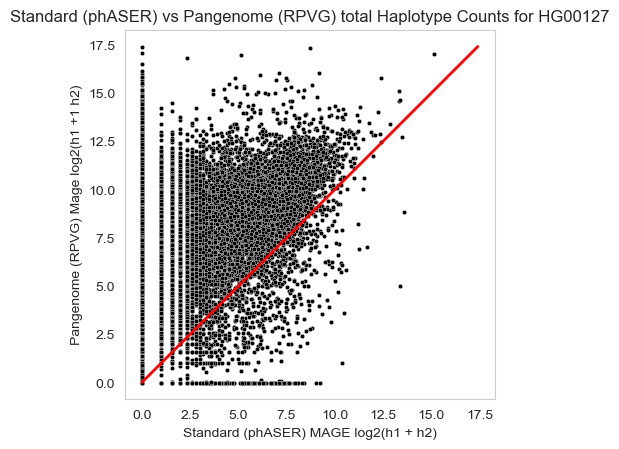

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for i in number_codes:
    
    #dataframe_name = f"{i}_PAN_MAGE_DF"
    dataframe_name = f"{i}_MAGE_DF"
    DF_PAN_MAGE_Merge = globals()[dataframe_name]
    
    sns.set_style("whitegrid")

    # Clear the previous figure before creating a new one
    plt.clf()

    # Create the Seaborn scatterplot with black smaller points
    sns.scatterplot(data=DF_PAN_MAGE_Merge, x='log_MAGE_Total', y='log_Pan_Total', 
                    color='black', s=10)  # s=10 makes the points smaller

    # Add a red line with slope 0.5 (y = 0.5 * x)
    x_vals = np.linspace(DF_PAN_MAGE_Merge['log_Pan_Total'].min(), DF_PAN_MAGE_Merge['log_Pan_Total'].max(), 100)
    y_vals = 1 * x_vals  # Line with slope 0.5
    plt.plot(x_vals, y_vals, color='red', linewidth=2)  # Red line

    # Set titles and labels
    plt.title(f"Standard (phASER) vs Pangenome (RPVG) total Haplotype Counts for {i}")
    plt.xlabel("Standard (phASER) MAGE log2(h1 + h2)")
    plt.ylabel("Pangenome (RPVG) Mage log2(h1 +1 h2)")
    
    plt.grid(False)
    plt.axis('equal')
    plt.axis('square')
    
    # Save the plot to the specified location
    plt.savefig(f"/Users/cavend/Desktop/20_EUROPE/EUR_20_Analysis/ScatterPlots/{i}_PAN_MAGE_log_plot.png", dpi=300)
    #plt.savefig(f"/Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/ScatterPlots/{i}_PAN_MAGE_log_plot.png", dpi=300)

/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_8983/1585606501.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot((DF_PAN_MAGE_Merge['ReadCount_2'] / DF_PAN_MAGE_Merge['Pan_Total']),
/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_8983/1585606501.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot((DF_PAN_MAGE_Merge['aCount'] / DF_PAN_MAGE_Merge['MAGE_Total']),
/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_8983/1585606501.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot((DF_PAN_MAGE_Merge['ReadCount_2'] / DF_PAN_MAGE_Merge['Pan_Total']),
/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d

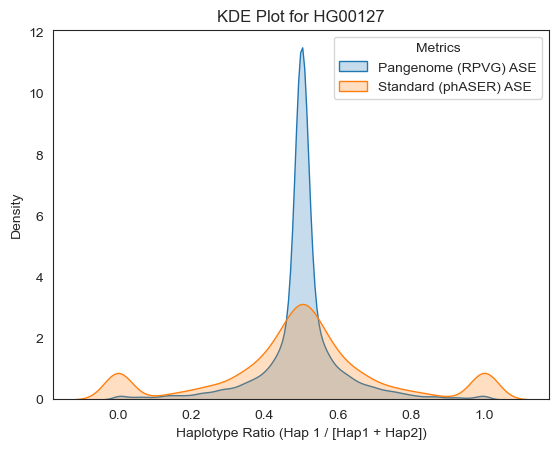

In [126]:
for i in number_codes:
    dataframe_name = f"{i}_MAGE_DF"
    DF_PAN_MAGE_Merge = globals()[dataframe_name]
    
    # Set the style to "white" to remove the grid
    sns.set_style("white")

    # Clear the previous figure before creating a new one
    plt.clf()
    
    sns.kdeplot((DF_PAN_MAGE_Merge['ReadCount_2'] / DF_PAN_MAGE_Merge['Pan_Total']), 
                shade=True, label='Pangenome (RPVG) ASE')
    sns.kdeplot((DF_PAN_MAGE_Merge['aCount'] / DF_PAN_MAGE_Merge['MAGE_Total']), 
                shade=True, label='Standard (phASER) ASE')
    
    # Add title, x-axis label, and legend
    plt.title(f"KDE Plot for {i}")
    plt.xlabel("Haplotype Ratio (Hap 1 / [Hap1 + Hap2])")
    plt.legend(title="Metrics")

    # Optionally save the figure
    plt.savefig(f"/Users/cavend/Desktop/20_EUROPE/EUR_20_Analysis/kdeplot/{i}_PAN_MAGE_kdeplot.png", dpi=300)
    # plt.savefig(f"/Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/kdeplot/{i}_PAN_MAGE_kdeplot.png", dpi=300)
    
    #plt.show()  # Show the plot
    #print(i)

In [64]:
Sample_HG00114 = pd.read_csv("/Users/cavend/Desktop/20_EUROPE/EUR_20_Analysis/CSVs/HG00114_PAN_MAGE_Merged.csv")

/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_8983/3783124597.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_8983/3783124597.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(( Sample_HG00114['ReadCount_1'] / Sample_HG00114['Pan_Total']) , shade = True, color='red')


<Axes: ylabel='Density'>

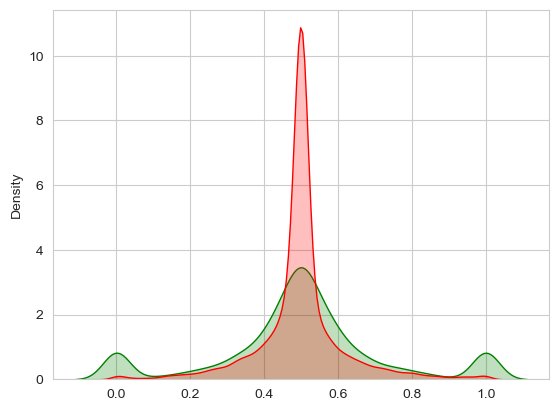

In [70]:
sns.set_style("whitegrid")

sns.kdeplot(
    (Sample_HG00114['aCount'] / Sample_HG00114['MAGE_Total']),
    shade=True,
    color='green'
)

sns.kdeplot(( Sample_HG00114['ReadCount_1'] / Sample_HG00114['Pan_Total']) , shade = True, color='red')

In [71]:
Sample_HG00114[["aCount", "bCount"]].describe()


,aCount,bCount
count,13927.000000,13927.000000
mean,49.007252,48.905292
std,247.024938,244.680048
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,3.000000
75%,31.000000,31.000000
max,12654.000000,12653.000000


In [72]:
Sample_HG00114[["ReadCount_1", "ReadCount_2"]].describe()

,ReadCount_1,ReadCount_2
count,14290.000000,14290.000000
mean,360.274388,367.166055
std,1337.491748,1480.226228
min,0.000000,0.000000
25%,7.526275,7.645594
50%,85.875111,87.375370
75%,320.169780,319.942114
max,50933.595760,77084.108140


In [35]:
dataframe_name = f"{i}_PAN_MAGE_DF"
DF_PAN_MAGE_Merge = globals()[dataframe_name]
print(dataframe_name)

sns.set_style("whitegrid")

# Clear the previous figure before creating a new one
plt.clf()

sns.kdeplot(( DF_PAN_MAGE_Merge['ReadCount_1'] / DF_PAN_MAGE_Merge['Pan_Total']) , shade = True, )
sns.kdeplot(( DF_PAN_MAGE_Merge['aCount'] / DF_PAN_MAGE_Merge['MAGE_Total']) , shade = True)


NameError: name 'i' is not defined

In [25]:
  for i in number_codes:
    dataframe_name = f"{i}_PAN_MAGE_DF"
    DF_PAN_MAGE_Merge = globals()[dataframe_name]
    print(dataframe_name)
    
    print(DF_PAN_MAGE_Merge[["ReadCount_1","ReadCount_2"]].describe())

    #plt.savefig(f"/Users/cavend/Desktop/20_EUROPE/EUR_20_Analysis/kdeplot/{i}_PAN_MAGE_kdeplot.png", dpi=300)
    #plt.savefig(f"/Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/kdeplot/{i}_PAN_MAGE_kdeplot.png", dpi=300)



In [26]:
NA12878_MAGE_DF[["aCount", "bCount"]].describe()

,aCount,bCount
count,56200.000000,56200.000000
mean,13.924715,13.987900
std,163.274070,159.967366
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,20639.000000,18958.000000


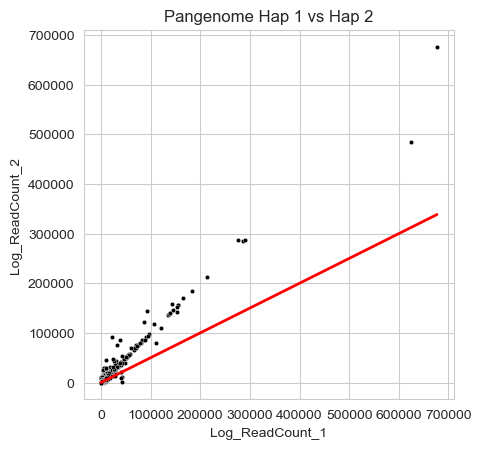

In [27]:
#for i in number_codes:

#dataframe_name = f"{i}_PAN_MAGE_DF"
#DF_PAN_MAGE_Merge = globals()[dataframe_name]
DF_PAN_MAGE_Merge = pd.read_csv("/Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/CSVs/NA12878-ALL_PAN_MAGE_Merged.csv")

DF_PAN_MAGE_Merge["Log_ReadCount_1"] = DF_PAN_MAGE_Merge["ReadCount_1"]
DF_PAN_MAGE_Merge["Log_ReadCount_2"] = DF_PAN_MAGE_Merge["ReadCount_2"]

sns.set_style("whitegrid")

# Clear the previous figure before creating a new one
plt.clf()

# Create the Seaborn scatterplot with black smaller points
sns.scatterplot(data=DF_PAN_MAGE_Merge, x= 'Log_ReadCount_1', y='Log_ReadCount_2', 
                color='black', s=10)  # s=10 makes the points smaller

# Add a red line with slope 0.5 (y = 0.5 * x)
x_vals = np.linspace(DF_PAN_MAGE_Merge['Log_ReadCount_1'].min(), DF_PAN_MAGE_Merge['Log_ReadCount_2'].max(), 100)
y_vals = 0.5 * x_vals  # Line with slope 0.5
plt.plot(x_vals, y_vals, color='red', linewidth=2)  # Red line

# Set titles and labels
plt.title("Pangenome Hap 1 vs Hap 2")
plt.xlabel("Log_ReadCount_1")
plt.ylabel("Log_ReadCount_2")

plt.axis('equal')
plt.axis('square')

# Save the plot to the specified location
#plt.savefig(f"/Users/cavend/Desktop/20_EUROPE/EUR_20_Analysis/ScatterPlots/{i}_PAN_MAGE_log_plot.png", dpi=300)
plt.savefig(f"/Users/cavend/Downloads/Test.png", dpi=300)

In [28]:
import pandas as pd

df_kallisto_all = pd.read_csv('/Users/cavend/Downloads/kallisto_strand_1kg_all_af001_gencode100.tsv', sep='\t')
df_kallisto_all['target_id'] = df_kallisto_all['target_id'].str.split('.').str[0]
#df_VG_all = pd.read_csv('/Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/CSVs/NA12878-ALL_PAN_MAGE_Merged.csv')

In [29]:
df_kallisto_all

,target_id,length,eff_length,est_counts,tpm
0,ENST00000456328,1657,1408.650,6.1263,0.049575
1,ENST00000456328,1657,1408.650,0.0000,0.000000
2,ENST00000456328,1657,1408.650,0.0000,0.000000
3,ENST00000456328,1657,1408.650,6.1263,0.049575
4,ENST00000456328,1657,1408.650,6.1263,0.049575
...,...,...,...,...,...
11835679,ENST00000399966,1054,805.654,0.0000,0.000000
11835680,ENST00000496011,828,579.654,0.0000,0.000000
11835681,ENST00000460206,1826,1577.650,0.0000,0.000000
11835682,ENST00000483079,658,409.654,0.0000,0.000000


In [30]:
#df[''] = df['target_id'].str.split('.').str[0]
Pangenome_VG_ALL_df = pd.read_csv("/Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/VG_TEAM/NA12878-ALL_rpvg_strand_mpmap_1kg_all_af001_gencode100_unidi_real_r2_SRR1153470_joint.txt", delimiter='\t')

In [31]:
Pangenome_VG_ALL_df = Pangenome_VG_ALL_df.rename(columns={'Name_1': 'target_id'})
Pangenome_VG_ALL_df['target_id'] = Pangenome_VG_ALL_df['target_id'].str.split('.').str[0]

Pangenome_VG_ALL_df

,target_id,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2
0,ENST00000594885,ENST00000594885.1_38,6,1.000000,2.703165e+01,1.205706,2.703165e+01,1.205706
1,ENST00000598436,ENST00000598436.1_15,6,1.000000,4.193724e+01,2.078805,4.193724e+01,2.078805
2,ENST00000598182,ENST00000598182.5_11,6,1.000000,2.052573e+00,0.091257,2.052573e+00,0.091257
3,ENST00000596417,ENST00000596417.1_9,6,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
4,ENST00000309311,ENST00000309311.6_144,6,1.000000,1.362554e+05,649.955890,1.384481e+05,660.415070
...,...,...,...,...,...,...,...,...
888825,ENST00000415757,ENST00000415757.7_1933,23818,0.120865,0.000000e+00,0.000000,0.000000e+00,0.000000
888826,ENST00000622037,ENST00000622037.1_2172,23818,0.048900,0.000000e+00,0.000000,0.000000e+00,0.000000
888827,ENST00000389232,ENST00000389232.9_1946,23818,0.051326,0.000000e+00,0.000000,0.000000e+00,0.000000
888828,ENST00000415757,ENST00000415757.7_1926,23818,0.040564,0.000000e+00,0.000000,0.000000e+00,0.000000


In [32]:
merged_VG_Kallisto_DATAFRAMES = Pangenome_VG_ALL_df.merge(df_kallisto_all[['target_id', 'est_counts', 'tpm']], on='target_id', how='inner')
merged_VG_Kallisto_DATAFRAMES

,target_id,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,est_counts,tpm
0,ENST00000594885,ENST00000594885.1_38,6,1.000000,27.031646,1.205706,27.031646,1.205706,0.0000,0.000000
1,ENST00000594885,ENST00000594885.1_38,6,1.000000,27.031646,1.205706,27.031646,1.205706,8.3056,0.285464
2,ENST00000594885,ENST00000594885.1_38,6,1.000000,27.031646,1.205706,27.031646,1.205706,21.2196,0.729318
3,ENST00000594885,ENST00000594885.1_38,6,1.000000,27.031646,1.205706,27.031646,1.205706,0.0000,0.000000
4,ENST00000594885,ENST00000594885.1_38,6,1.000000,27.031646,1.205706,27.031646,1.205706,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...
184655714,ENST00000415757,ENST00000415757.7_1926,23818,0.040564,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
184655715,ENST00000415757,ENST00000415757.7_1926,23818,0.040564,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
184655716,ENST00000415757,ENST00000415757.7_1926,23818,0.040564,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
184655717,ENST00000415757,ENST00000415757.7_1926,23818,0.040564,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


In [109]:
Pangenome_VG_ALL_df_FULL = pd.read_csv(
    "/Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/CSVs/NA12878-ALL_PAN_MAGE_Merged.csv")

In [110]:
Pangenome_VG_ALL_df_FULL["log_MAGE_h1_h2_abs"] = Pangenome_VG_ALL_df_FULL["log_MAGE_h1_h2"].abs()
Pangenome_VG_ALL_df_FULL["log_Pan_h1_h2_abs"] = Pangenome_VG_ALL_df_FULL["log_Pan_h1_h2"].abs()

Pangenome_VG_ALL_df_FULL['log_Pan_h1_h2_FLIPPED'] = np.log2(((Pangenome_VG_ALL_df_FULL['ReadCount_2']+1)/(Pangenome_VG_ALL_df_FULL['ReadCount_1']+1))).abs()

Pangenome_VG_ALL_df_FULL_50 = Pangenome_VG_ALL_df_FULL[Pangenome_VG_ALL_df_FULL["Pan_Total"] > 50]
Pangenome_VG_ALL_df_FULL_50 = Pangenome_VG_ALL_df_FULL[Pangenome_VG_ALL_df_FULL["MAGE_Total"] > 50]

In [111]:
Pangenome_VG_ALL_df_FULL_50

,gene_id,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,gene_type,aCount,bCount,Pan_Total,MAGE_Total,log_Pan_Total,log_MAGE_Total,log_Pan_h1_h2,log_MAGE_h1_h2,ReadCount_1_int,ReadCount_2_int,log_MAGE_h1_h2_abs,log_Pan_h1_h2_abs,log_Pan_h1_h2_FLIPPED
5,ENSG00000001036,1.000000,0.000000,0.000000,9.262206,0.340502,protein_coding,280.0,202.0,9.262206,482.0,3.359269,8.915879,-3.359269,0.469090,1,10,0.469090,3.359269,3.359269
11,ENSG00000001561,0.333333,1224.759751,3.860788,1249.235916,3.936146,protein_coding,87.0,92.0,2473.995666,179.0,11.273210,7.491853,-0.028524,-0.079727,1225,1250,0.079727,0.028524,0.028524
14,ENSG00000001629,0.333333,3.436066,0.283236,3.563934,0.293776,protein_coding,82.0,76.0,7.000000,158.0,3.000000,7.312883,-0.040997,0.108253,4,4,0.108253,0.040997,0.040997
15,ENSG00000001630,0.500000,3334.110000,15.655244,3228.716718,15.285200,protein_coding,176.0,213.0,6562.826718,389.0,12.680321,8.607330,0.046327,-0.273861,3335,3229,0.273861,0.046327,0.046327
18,ENSG00000002330,0.714286,819.865099,17.323038,882.767706,18.514984,protein_coding,110.0,89.0,1702.632806,199.0,10.734399,7.643856,-0.106522,0.302563,820,883,0.302563,0.106522,0.106522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15279,ENSG00000277443,0.500000,2933.558692,10.111079,3204.745934,11.045778,protein_coding,24.0,38.0,6138.304626,62.0,12.583860,5.977280,-0.127517,-0.641546,2934,3205,0.641546,0.127517,0.127517
15292,ENSG00000278195,0.333333,473.590192,1.706915,568.835719,2.050226,protein_coding,122.0,166.0,1042.425911,288.0,10.027112,8.174926,-0.263864,-0.441190,474,569,0.441190,0.263864,0.263864
15295,ENSG00000278259,0.800000,1724.202664,15.429343,1713.536522,15.119745,protein_coding,64.0,101.0,3437.739186,165.0,11.747664,7.375039,0.008947,-0.650058,1725,1714,0.650058,0.008947,0.008947
15299,ENSG00000278311,0.555556,2484.797162,14.730777,3488.685079,20.670205,protein_coding,266.0,220.0,5973.482241,486.0,12.544598,8.927778,-0.489388,0.272793,2485,3489,0.272793,0.489388,0.489388


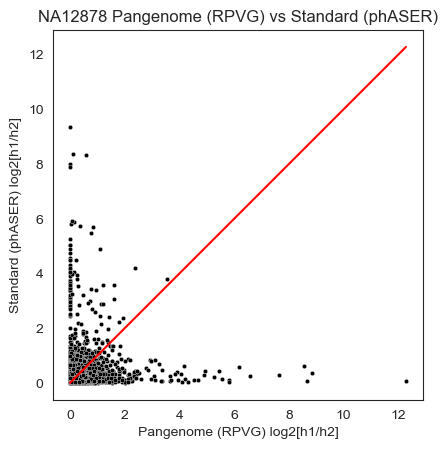

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming `Pangenome_VG_ALL_df_FULL` is your DataFrame
x = Pangenome_VG_ALL_df_FULL_50['log_Pan_h1_h2_abs']
y = Pangenome_VG_ALL_df_FULL_50['log_MAGE_h1_h2_abs']

# Calculate the Spearman correlation
spearman_corr, p_value = stats.spearmanr(x, y)

# Create the scatterplot
sns.scatterplot(data=Pangenome_VG_ALL_df_FULL_50, x='log_Pan_h1_h2_abs', y='log_MAGE_h1_h2_abs', 
                color='black', s=10)  # s=10 makes the points smaller

# Add a line with a slope of 1 (y = x)
x_vals = [min(x), max(x)]  # Use the min and max values of x to define the line
plt.plot(x_vals, x_vals, color='red')  # No label

# Set titles and labels
plt.title("NA12878 Pangenome (RPVG) vs Standard (phASER)")
plt.xlabel("Pangenome (RPVG) log2[h1/h2]")
plt.ylabel("Standard (phASER) log2[h1/h2]")

# Adjust the axis settings
plt.axis('equal')
plt.axis('square')

# Save the plot
plt.savefig("/Users/cavend/Downloads/NA12878_Pangenome_vs_Standard_log_Filter_50.png", dpi=300)
plt.show()


In [37]:
Pangenome_VG_ALL_df_FULL.corr(method='spearman', min_periods=1, numeric_only=False)

ValueError: could not convert string to float: 'ENSG00000000003'

In [38]:
# Assuming `Pangenome_VG_ALL_df_FULL` is your DataFrame
x = Pangenome_VG_ALL_df_FULL['log_Pan_h1_h2_abs']
y = Pangenome_VG_ALL_df_FULL['log_MAGE_h1_h2_abs']

# Calculate the Spearman correlation
spearman_corr, p_value = stats.spearmanr(x, y)

spearman_corr

nan

In [39]:
Pangenome_VG_ALL_df_FULL_Correlation = Pangenome_VG_ALL_df_FULL['log_Pan_h1_h2_abs'].corr(Pangenome_VG_ALL_df_FULL['log_MAGE_h1_h2_abs'], method='spearman')

Pangenome_VG_ALL_df_FULL_Correlation

0.1748536887856117

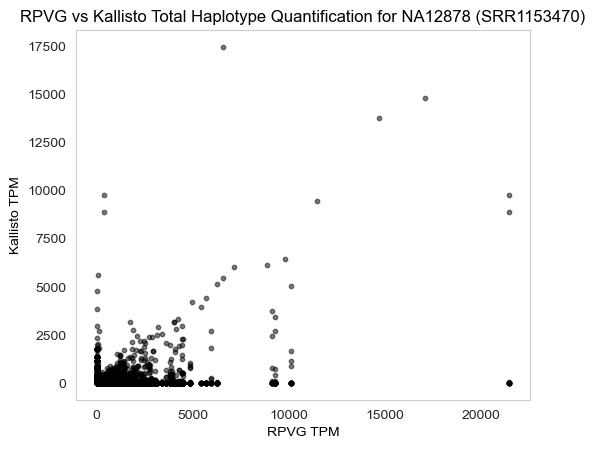

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

# Downsample for visualization if necessary
# merged_VG_Kallisto_DATAFRAMES_DS = merged_VG_Kallisto_DATAFRAMES.sample(n=100000)  # Adjust sample size based on your needs

merged_VG_Kallisto_DATAFRAMES_DS = merged_VG_Kallisto_DATAFRAMES

merged_VG_Kallisto_DATAFRAMES_DS["TMP_Total"] = merged_VG_Kallisto_DATAFRAMES_DS["TPM_1"] + merged_VG_Kallisto_DATAFRAMES_DS["TPM_2"]

# Create the scatter plot with larger points
plt.scatter(x = merged_VG_Kallisto_DATAFRAMES_DS['TMP_Total'], y = merged_VG_Kallisto_DATAFRAMES_DS['tpm'], s=10, alpha=0.5, color='black')  # Adjust marker size with s=10

# Set axis labels and title with black text
plt.xlabel('RPVG TPM', color='black')
plt.ylabel('Kallisto TPM', color='black')
plt.title('RPVG vs Kallisto Total Haplotype Quantification for NA12878 (SRR1153470)', color='black')

# Remove gridlines
plt.grid(False)

# Set aspect ratio to be equal to make the plot square
plt.gca().set_aspect('equal', adjustable='box')

# Save the plot with high resolution
plt.savefig("/Users/cavend/Downloads/Kallisto_vs_VG_Total_TPM.png", dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()


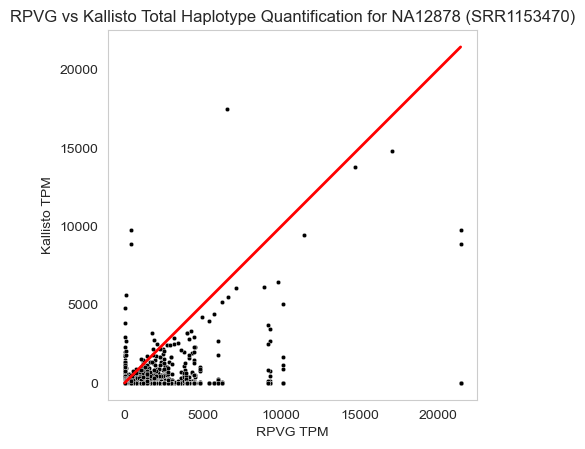

In [125]:
# Create the Seaborn scatterplot with black smaller points
sns.scatterplot(data=merged_VG_Kallisto_DATAFRAMES_DS, x='TMP_Total', y='tpm', 
                color='black', s=10)  # s=10 makes the points smaller

# Add a red line with slope 0.5 (y = 0.5 * x)
x_vals = np.linspace(merged_VG_Kallisto_DATAFRAMES_DS['TMP_Total'].min(), merged_VG_Kallisto_DATAFRAMES_DS['TMP_Total'].max(), 100)
y_vals = 1 * x_vals  # Line with slope 0.5
plt.plot(x_vals, y_vals, color='red', linewidth=2)  # Red line

# Set titles and labels
plt.title(f"RPVG vs Kallisto Total Haplotype Quantification for NA12878 (SRR1153470)")
plt.xlabel("RPVG TPM")
plt.ylabel("Kallisto TPM")

plt.grid(False)
plt.axis('equal')
plt.axis('square')

# Save the plot to the specified location
plt.savefig(f"/Users/cavend/Desktop/Kallisto_vs_VG_Total_TPM.png", dpi=300)
#plt.savefig(f"/Users/cavend/Desktop/ASE_VG_TEAM_FROM_PAPER/ScatterPlots/{i}_PAN_MAGE_log_plot.png", dpi=300)

In [44]:
merged_VG_Kallisto_DATAFRAMES_DS['TMP_Total'].describe()

count    1.846557e+08
mean     3.622273e-01
std      2.004858e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.074802e-05
75%      2.303614e-04
max      2.144545e+04
Name: TMP_Total, dtype: float64

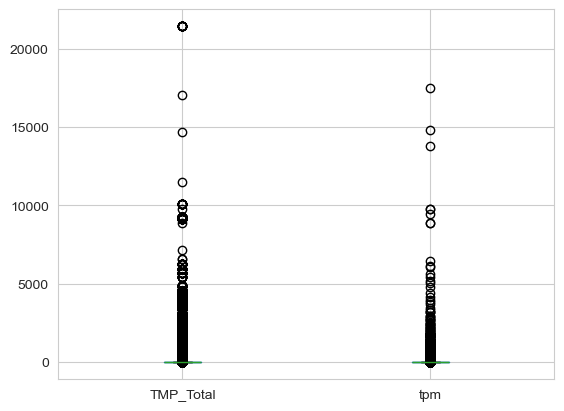

In [47]:
boxplot = merged_VG_Kallisto_DATAFRAMES_DS.boxplot(column=['TMP_Total', 'tpm'])

In [25]:
merged_VG_Kallisto_DATAFRAMES_DS['tpm'].describe()

count    1.846557e+08
mean     8.625856e-03
std      3.480867e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.747170e+04
Name: tpm, dtype: float64